## Churn Prediction

required table :
1. customer
2. cust_order
3. order_status
4. order_history
5. address
6. address_status
7. order_line
8. shipping_method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"D:\DS_Final_Project\Notebook\data\RAW_CSV"

customer = pd.read_csv(f"{path}\\customer.csv")
cust_order = pd.read_csv(f"{path}\\cust_order.csv")
customer_address = pd.read_csv(f"{path}\\customer_address.csv")
address = pd.read_csv(f"{path}\\address.csv")
address_status = pd.read_csv(f"{path}\\address_status.csv")
order_history = pd.read_csv(f"{path}\\order_history.csv")
order_line = pd.read_csv(f"{path}\\order_line.csv")
order_status = pd.read_csv(f"{path}\\order_status.csv")
shipping_method = pd.read_csv(f"{path}\\shipping_method.csv")



In [2]:
tables = [
    ("customer", customer),
    ("cust_order", cust_order),
    ("customer_address", customer_address),
    ("address", address),
    ("address_status", address_status),
    ("order_history", order_history),
    ("order_line", order_line),
    ("order_status", order_status),
    ("shipping_method", shipping_method)]

for name,df in tables:
    print(f"{name} : {list(df.columns)}")
    print("-"*50)


customer : ['customer_id', 'first_name', 'last_name', 'email']
--------------------------------------------------
cust_order : ['order_id', 'order_date', 'customer_id', 'shipping_method_id', 'dest_address_id']
--------------------------------------------------
customer_address : ['customer_id', 'address_id', 'status_id']
--------------------------------------------------
address : ['address_id', 'street_number', 'street_name', 'city', 'country_id']
--------------------------------------------------
address_status : ['status_id', 'address_status']
--------------------------------------------------
order_history : ['history_id', 'order_id', 'status_id', 'status_date']
--------------------------------------------------
order_line : ['line_id', 'order_id', 'book_id', 'price']
--------------------------------------------------
order_status : ['status_id', 'status_value']
--------------------------------------------------
shipping_method : ['method_id', 'method_name', 'cost']
---------------

In [3]:
#customer & cust_order & customer_address == customer id
#cust_order & order_history & order line == order_id
#cust_order & customer_address & address == address_id
#customer_address & address_status == status_id
#order_history & order_status == status id  (Both are different)

In [3]:
customer.sample(10)

,customer_id,first_name,last_name,email
787,788,Carlotta,Baccus,cbaccuslv@dion.ne.jp
1384,1385,Wendall,Gillicuddy,wgillicuddyao@jiathis.com
133,134,Helyn,Carrol,hcarrol3p@adobe.com
1991,1992,Celisse,Mickleborough,cmickleboroughrj@t-online.de
1128,1129,Georgena,Stango,gstango3k@amazonaws.com
1463,1464,Deloria,Skpsey,dskpseycv@usda.gov
1798,1799,Kienan,Mauser,kmauserm6@nationalgeographic.com
1334,1335,Tremayne,Stritton,tstritton9a@issuu.com
1788,1789,Mikkel,Rubenczyk,mrubenczyklw@linkedin.com
966,967,Nanette,Elphinstone,nelphinstonequ@fc2.com


In [4]:
#checking for any null values
customer.isnull().sum()

customer_id    0
first_name     0
last_name      0
email          0
dtype: int64

In [5]:
#checking for duplicates
print(customer.duplicated().sum())

0


In [6]:
# Check for the shape
customer['customer_id'].shape

(2000,)

In [7]:
# Taking copy of the dataframe to retain the original df
customer_df = customer.copy()
customer_df

,customer_id,first_name,last_name,email
0,1,Ursola,Purdy,upurdy0@cdbaby.com
1,2,Ruthanne,Vatini,rvatini1@fema.gov
2,3,Reidar,Turbitt,rturbitt2@geocities.jp
3,4,Rich,Kirsz,rkirsz3@jalbum.net
4,5,Carline,Kupis,ckupis4@tamu.edu
...,...,...,...,...
1995,1996,Byron,Mayor,bmayorrn@netscape.com
1996,1997,Janean,Coatsworth,jcoatsworthro@purevolume.com
1997,1998,Georgeanna,Garman,ggarmanrp@surveymonkey.com
1998,1999,Ardeen,Caret,acaretrq@wsj.com


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  2000 non-null   int64 
 1   first_name   2000 non-null   object
 2   last_name    2000 non-null   object
 3   email        2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [9]:
# Taking copy of the dataframe to retain the original df

cust_order_df = cust_order.copy()

In [11]:
cust_order_df.shape

(7550, 5)

In [10]:
cust_order_df.isnull().sum()

order_id              0
order_date            0
customer_id           0
shipping_method_id    0
dest_address_id       0
dtype: int64

In [11]:
print(cust_order_df.duplicated().sum())

0


In [14]:
cust_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            7550 non-null   int64 
 1   order_date          7550 non-null   object
 2   customer_id         7550 non-null   int64 
 3   shipping_method_id  7550 non-null   int64 
 4   dest_address_id     7550 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 295.1+ KB


In [13]:
cust_order_df.drop_duplicates()

,order_id,order_date,customer_id,shipping_method_id,dest_address_id
0,1,2023-08-22 16:12:12,413,2,1
1,2,2023-07-25 03:52:27,1338,1,1
2,3,2022-05-26 14:15:06,1464,3,2
3,4,2022-01-01 10:23:19,269,2,3
4,5,2024-11-29 11:35:26,1463,4,3
...,...,...,...,...,...
7545,11430,2023-12-26 05:07:16,1850,4,13
7546,11431,2022-04-02 13:38:31,673,1,14
7547,11432,2024-05-22 11:34:37,427,2,15
7548,11433,2023-08-22 15:39:28,506,4,15


In [12]:
pd.set_option('display.max_column',50)

In [17]:
cust_order_df["order_date"] = pd.to_datetime(cust_order_df["order_date"])
cust_order_df['cust_order_day'] = cust_order_df['order_date'].dt.day
cust_order_df['cust_order_month'] = cust_order_df['order_date'].dt.month
cust_order_df['cust_order_year'] = cust_order_df["order_date"].dt.year
cust_order_df['order_date_formatted'] = cust_order_df["order_date"].dt.strftime('%m-%d-%Y')
cust_order_df.drop(["order_date"],axis=1,inplace=True)
cust_order_df

,order_id,customer_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted
0,1,413,2,1,22,8,2023,08-22-2023
1,2,1338,1,1,25,7,2023,07-25-2023
2,3,1464,3,2,26,5,2022,05-26-2022
3,4,269,2,3,1,1,2022,01-01-2022
4,5,1463,4,3,29,11,2024,11-29-2024
...,...,...,...,...,...,...,...,...
7545,11430,1850,4,13,26,12,2023,12-26-2023
7546,11431,673,1,14,2,4,2022,04-02-2022
7547,11432,427,2,15,22,5,2024,05-22-2024
7548,11433,506,4,15,22,8,2023,08-22-2023


In [18]:
cust_order_df.isnull().sum()

order_id                0
customer_id             0
shipping_method_id      0
dest_address_id         0
cust_order_day          0
cust_order_month        0
cust_order_year         0
order_date_formatted    0
dtype: int64

In [19]:
# Taking copy of Order line table
order_line_df = order_line.copy()


In [20]:
order_line_df.sample(5)

,line_id,order_id,book_id,price
13988,14772,6452,6880,18.54
11808,12545,141,9036,19.05
12743,13480,2077,4733,13.13
9584,10226,11023,6357,0.95
8565,9207,9028,4619,13.48


In [21]:
order_line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   line_id   15400 non-null  int64  
 1   order_id  15400 non-null  int64  
 2   book_id   15400 non-null  int64  
 3   price     15400 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 481.4 KB


In [22]:
order_line_df.isnull().sum()

line_id     0
order_id    0
book_id     0
price       0
dtype: int64

In [23]:
print(order_line_df.duplicated().sum())

0


In [24]:
order_line_df

,line_id,order_id,book_id,price
0,1,1213,6476,13.42
1,2,5308,6784,0.70
2,3,240,3857,12.55
3,4,2333,1091,12.14
4,5,4335,8258,17.79
...,...,...,...,...
15395,16424,11428,6825,0.91
15396,16425,8315,1606,13.99
15397,16426,4695,8707,17.82
15398,16427,6550,10090,10.23


In [25]:
#Merging customer table and cust_order table

customer_cust_order_df = pd.merge(customer,cust_order_df,how="left",on="customer_id")
customer_cust_order_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted
3865,955,Mercedes,Gorger,mgorgerqi@bizjournals.com,5553.0,3.0,436.0,18.0,1.0,2022.0,01-18-2022
908,229,Carrie,Arran,carran6c@dion.ne.jp,997.0,3.0,292.0,10.0,4.0,2024.0,04-10-2024
5444,1385,Wendall,Gillicuddy,wgillicuddyao@jiathis.com,8411.0,4.0,72.0,10.0,8.0,2023.0,08-10-2023
5124,1309,Wolfy,Swatman,wswatman8k@prnewswire.com,10763.0,1.0,6.0,20.0,10.0,2022.0,10-20-2022
2498,640,Conrade,Kollatsch,ckollatschhr@is.gd,9583.0,1.0,115.0,1.0,7.0,2022.0,07-01-2022


In [26]:
# Merging customer_cust_order and  order line df

merged_customer_df = pd.merge(customer_cust_order_df,order_line_df,how='left',on='order_id')
merged_customer_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price
3080,369,Arvy,Jobbing,ajobbinga8@alibaba.com,4261.0,1.0,51.0,7.0,6.0,2023.0,06-07-2023,1471.0,7821.0,16.88
3066,368,Nevil,Tavinor,ntavinora7@blogspot.com,1331.0,2.0,393.0,4.0,1.0,2022.0,01-04-2022,1465.0,10202.0,5.34
8285,1017,Fern,O'Gavin,fogaving@bravesites.com,11312.0,2.0,17.0,12.0,7.0,2024.0,07-12-2024,3978.0,9007.0,13.45
13690,1757,Monique,McOrkil,mmcorkill0@ow.ly,1351.0,3.0,398.0,17.0,6.0,2022.0,06-17-2022,8446.0,3066.0,5.56
8817,1105,Winifield,Bilham,wbilham2w@google.co.uk,9311.0,3.0,29.0,30.0,7.0,2022.0,07-30-2022,12336.0,2345.0,0.67


In [27]:
merged_customer_df["order_date_formatted"] = pd.to_datetime(merged_customer_df["order_date_formatted"])

merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15699 entries, 0 to 15698
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           15699 non-null  int64         
 1   first_name            15699 non-null  object        
 2   last_name             15699 non-null  object        
 3   email                 15699 non-null  object        
 4   order_id              15400 non-null  float64       
 5   shipping_method_id    15400 non-null  float64       
 6   dest_address_id       15400 non-null  float64       
 7   cust_order_day        15400 non-null  float64       
 8   cust_order_month      15400 non-null  float64       
 9   cust_order_year       15400 non-null  float64       
 10  order_date_formatted  15400 non-null  datetime64[ns]
 11  line_id               15400 non-null  float64       
 12  book_id               15400 non-null  float64       
 13  price           

In [28]:
merged_customer_df.isnull().sum()

customer_id               0
first_name                0
last_name                 0
email                     0
order_id                299
shipping_method_id      299
dest_address_id         299
cust_order_day          299
cust_order_month        299
cust_order_year         299
order_date_formatted    299
line_id                 299
book_id                 299
price                   299
dtype: int64

In [29]:
#notna() returns true or false when we have Non-null(not for missing values)
merged_customer_df['has_order'] = merged_customer_df['order_id'].notna().astype(int)
merged_customer_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order
14427,1849,Paulita,Cassel,pcasselnk@tmall.com,4882.0,3.0,237.0,19.0,8.0,2024.0,2024-08-19,6955.0,3634.0,11.79,1
10926,1390,Ronny,Rubinowitsch,rrubinowitschat@ebay.co.uk,10844.0,2.0,28.0,14.0,4.0,2024.0,2024-04-14,5258.0,8445.0,13.01,1
13938,1792,Brigit,Huetson,bhuetsonlz@ebay.com,5208.0,4.0,326.0,10.0,2.0,2023.0,2023-02-10,6709.0,5110.0,4.30,1
4619,592,Staford,Antognazzi,santognazzigf@chronoengine.com,6610.0,4.0,146.0,9.0,6.0,2024.0,2024-06-09,9030.0,3678.0,6.37,1
3630,458,Margareta,Rentalll,mrentalllcp@cam.ac.uk,2301.0,1.0,699.0,22.0,7.0,2024.0,2024-07-22,1743.0,8252.0,2.95,1


In [30]:
merged_customer_df[merged_customer_df['order_id'].isnull()].sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order
12667,1625,Sandra,Jedrych,sjedrychhc@arstechnica.com,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
4655,598,Paxton,Baroux,pbarouxgl@free.fr,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
12646,1619,Corabel,Clymo,cclymoh6@a8.net,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
1511,188,Jonell,Cescon,jcescon57@arizona.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
10114,1290,Janina,Denford,jdenford81@earthlink.net,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0


In [31]:
merged_customer_df.isnull().sum()

customer_id               0
first_name                0
last_name                 0
email                     0
order_id                299
shipping_method_id      299
dest_address_id         299
cust_order_day          299
cust_order_month        299
cust_order_year         299
order_date_formatted    299
line_id                 299
book_id                 299
price                   299
has_order                 0
dtype: int64

In [32]:
# Fill missing order-related columns with a 0 value
merged_customer_df['order_id'] = merged_customer_df['order_id'].fillna(0).astype(int)
merged_customer_df['shipping_method_id'] = merged_customer_df['shipping_method_id'].fillna(0).astype(int)
merged_customer_df['dest_address_id'] = merged_customer_df['dest_address_id'].fillna(0).astype(int)
merged_customer_df['cust_order_day'] = merged_customer_df['cust_order_day'].fillna(0).astype(int)
merged_customer_df['cust_order_month'] = merged_customer_df['cust_order_month'].fillna(0).astype(int)
merged_customer_df['cust_order_year'] = merged_customer_df['cust_order_year'].fillna(0).astype(int)

merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].fillna('No Date')

merged_customer_df['line_id'] = merged_customer_df['line_id'].fillna(0).astype(int)
merged_customer_df['book_id'] = merged_customer_df['book_id'].fillna(0).astype(int)
merged_customer_df['price'] = merged_customer_df['price'].fillna(0).astype(float)  


In [33]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15699 entries, 0 to 15698
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           15699 non-null  int64  
 1   first_name            15699 non-null  object 
 2   last_name             15699 non-null  object 
 3   email                 15699 non-null  object 
 4   order_id              15699 non-null  int64  
 5   shipping_method_id    15699 non-null  int64  
 6   dest_address_id       15699 non-null  int64  
 7   cust_order_day        15699 non-null  int64  
 8   cust_order_month      15699 non-null  int64  
 9   cust_order_year       15699 non-null  int64  
 10  order_date_formatted  15699 non-null  object 
 11  line_id               15699 non-null  int64  
 12  book_id               15699 non-null  int64  
 13  price                 15699 non-null  float64
 14  has_order             15699 non-null  int64  
dtypes: float64(1), int6

In [34]:
merged_customer_df.isnull().sum()

customer_id             0
first_name              0
last_name               0
email                   0
order_id                0
shipping_method_id      0
dest_address_id         0
cust_order_day          0
cust_order_month        0
cust_order_year         0
order_date_formatted    0
line_id                 0
book_id                 0
price                   0
has_order               0
dtype: int64

In [35]:
order_history_df = order_history.copy()

In [36]:
order_history_df.duplicated().sum()

np.int64(0)

In [37]:
order_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22349 entries, 0 to 22348
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   history_id   22349 non-null  int64 
 1   order_id     22349 non-null  int64 
 2   status_id    22349 non-null  int64 
 3   status_date  22349 non-null  object
dtypes: int64(3), object(1)
memory usage: 698.5+ KB


In [38]:
order_history_df.isnull().sum()

history_id     0
order_id       0
status_id      0
status_date    0
dtype: int64

In [39]:
order_history_df.columns

Index(['history_id', 'order_id', 'status_id', 'status_date'], dtype='object')

In [40]:
#Formatting the status date

order_history_df['status_date'] = pd.to_datetime(order_history_df['status_date'])
order_history_df['order_hist_day'] = order_history_df['status_date'].dt.day
order_history_df['order_hist_month_num'] = order_history_df['status_date'].dt.month
order_history_df['order_hist_month_name'] = order_history_df['status_date'].dt.month_name()
order_history_df['order_hist_year'] = order_history_df['status_date'].dt.year
order_history_df['hist_status_date'] = order_history_df['status_date'].dt.strftime('%m-%d-%Y')
order_history_df['hist_status_date'] = pd.to_datetime(order_history_df['hist_status_date'])
order_history_df.drop("status_date",inplace=True,axis=1)
order_history_df.sample(5)

,history_id,order_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date
20242,22371,1153,4,19,8,August,2022,2022-08-19
1924,1925,1926,1,3,3,March,2023,2023-03-03
15093,17127,5525,3,10,1,January,2022,2022-01-10
15063,17097,4564,3,12,5,May,2022,2022-05-12
10301,10944,10798,2,9,1,January,2023,2023-01-09


In [41]:
order_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22349 entries, 0 to 22348
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   history_id             22349 non-null  int64         
 1   order_id               22349 non-null  int64         
 2   status_id              22349 non-null  int64         
 3   order_hist_day         22349 non-null  int32         
 4   order_hist_month_num   22349 non-null  int32         
 5   order_hist_month_name  22349 non-null  object        
 6   order_hist_year        22349 non-null  int32         
 7   hist_status_date       22349 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(3), object(1)
memory usage: 1.1+ MB


In [42]:
# Taking a copy of order line table
order_status_df = order_status.copy()
order_status_df

,status_id,status_value
0,1,Order Received
1,2,Pending Delivery
2,3,Delivery In Progress
3,4,Delivered
4,5,Cancelled
5,6,Returned


In [43]:
order_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_id     6 non-null      int64 
 1   status_value  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [44]:
print(order_history_df.shape, order_status.shape)

(22349, 8) (6, 2)


In [45]:
# Merging order history df and order status df.

hist_status_df = pd.merge(order_history_df,order_status_df,how='left',on='status_id')
hist_status_df.head()


,history_id,order_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value
0,1,1,1,22,8,August,2023,2023-08-22,Order Received
1,2,2,1,25,7,July,2023,2023-07-25,Order Received
2,3,3,1,26,5,May,2022,2022-05-26,Order Received
3,4,4,1,1,1,January,2022,2022-01-01,Order Received
4,5,5,1,29,11,November,2024,2024-11-29,Order Received


In [46]:
merged_customer_df.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'order_id',
       'shipping_method_id', 'dest_address_id', 'cust_order_day',
       'cust_order_month', 'cust_order_year', 'order_date_formatted',
       'line_id', 'book_id', 'price', 'has_order'],
      dtype='object')

In [47]:
hist_status_df.columns

Index(['history_id', 'order_id', 'status_id', 'order_hist_day',
       'order_hist_month_num', 'order_hist_month_name', 'order_hist_year',
       'hist_status_date', 'status_value'],
      dtype='object')

In [48]:
merged_customer_df = pd.merge(merged_customer_df,hist_status_df,how='left',on='order_id')
merged_customer_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value
21190,899,Austen,Alyutin,aalyutinoy@scribd.com,2057,2,622,17,8,2023,2023-08-17 00:00:00,3453,6226,14.02,1,2056.0,1.0,17.0,8.0,August,2023.0,2023-08-17,Order Received
13148,575,Ilise,Byfford,ibyffordfy@ebay.com,387,4,120,19,1,2022,2022-01-19 00:00:00,11677,8193,5.94,1,22125.0,4.0,26.0,1.0,January,2022.0,2022-01-26,Delivered
32130,1403,Ivar,Osinin,iosininb6@cisco.com,4720,3,194,18,7,2023,2023-07-18 00:00:00,5294,9960,12.37,1,13926.0,2.0,19.0,7.0,July,2023.0,2023-07-19,Pending Delivery
9542,389,Sibley,Lobb,slobbas@cam.ac.uk,10483,3,78,6,10,2022,2022-10-06 00:00:00,1550,3493,1.19,1,19649.0,3.0,9.0,10.0,October,2022.0,2022-10-09,Delivery In Progress
43122,1889,Jorrie,Pedder,jpedderoo@marketwatch.com,1313,3,386,4,9,2022,2022-09-04 00:00:00,7105,5543,12.12,1,1312.0,1.0,4.0,9.0,September,2022.0,2022-09-04,Order Received


In [49]:
# Convert the 'order_date_formatted' to a different format

merged_customer_df['order_date_formatted'] = pd.to_datetime(merged_customer_df['order_date_formatted'],errors='coerce')
merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].dt.strftime('%Y-%m-%d')

# Print the result
merged_customer_df


,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,1212.0,1.0,7.0,2.0,February,2023.0,2023-02-07,Order Received
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,12860.0,2.0,8.0,2.0,February,2023.0,2023-02-08,Pending Delivery
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,18936.0,3.0,8.0,2.0,February,2023.0,2023-02-08,Delivery In Progress
3,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,21072.0,4.0,9.0,2.0,February,2023.0,2023-02-09,Delivered
4,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,25124.0,6.0,11.0,2.0,February,2023.0,2023-02-11,Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45910,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,19475.0,3.0,30.0,5.0,May,2022.0,2022-05-30,Delivery In Progress
45911,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,23532.0,4.0,1.0,6.0,June,2022.0,2022-06-01,Delivered
45912,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,7019.0,1.0,22.0,5.0,May,2024.0,2024-05-22,Order Received
45913,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,14753.0,2.0,23.0,5.0,May,2024.0,2024-05-23,Pending Delivery


In [50]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45915 entries, 0 to 45914
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            45915 non-null  int64         
 1   first_name             45915 non-null  object        
 2   last_name              45915 non-null  object        
 3   email                  45915 non-null  object        
 4   order_id               45915 non-null  int64         
 5   shipping_method_id     45915 non-null  int64         
 6   dest_address_id        45915 non-null  int64         
 7   cust_order_day         45915 non-null  int64         
 8   cust_order_month       45915 non-null  int64         
 9   cust_order_year        45915 non-null  int64         
 10  order_date_formatted   45616 non-null  object        
 11  line_id                45915 non-null  int64         
 12  book_id                45915 non-null  int64         
 13  p

In [51]:
merged_customer_df.isnull().sum()

customer_id                0
first_name                 0
last_name                  0
email                      0
order_id                   0
shipping_method_id         0
dest_address_id            0
cust_order_day             0
cust_order_month           0
cust_order_year            0
order_date_formatted     299
line_id                    0
book_id                    0
price                      0
has_order                  0
history_id               300
status_id                300
order_hist_day           300
order_hist_month_num     300
order_hist_month_name    300
order_hist_year          300
hist_status_date         300
status_value             300
dtype: int64

In [52]:
# Create a flag to indicate whether a customer has order history
merged_customer_df['has_order_history'] = merged_customer_df['history_id'].notna().astype(int)


In [53]:
# Correct way to handle missing values without inplace=True
merged_customer_df['history_id'] = merged_customer_df['history_id'].fillna(0)
merged_customer_df['status_id'] = merged_customer_df['status_id'].fillna(0)
merged_customer_df['order_hist_day'] = merged_customer_df['order_hist_day'].fillna(0)
merged_customer_df['order_hist_month_num'] = merged_customer_df['order_hist_month_num'].fillna(0)
merged_customer_df['order_hist_month_name'] = merged_customer_df['order_hist_month_name'].fillna('No History')
merged_customer_df['order_hist_year'] = merged_customer_df['order_hist_year'].fillna(0)
merged_customer_df['hist_status_date'] = merged_customer_df['hist_status_date'].fillna('No History')
merged_customer_df['status_value'] = merged_customer_df['status_value'].fillna('No History')

# For order_date_formatted column
#merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].fillna('No Date')


In [54]:
pd.set_option('display.max_columns',50)

In [57]:
merged_customer_df.head()

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value,has_order_history
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,1212.0,1.0,7.0,2.0,February,2023.0,2023-02-07 00:00:00,Order Received,1
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,12860.0,2.0,8.0,2.0,February,2023.0,2023-02-08 00:00:00,Pending Delivery,1
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,18936.0,3.0,8.0,2.0,February,2023.0,2023-02-08 00:00:00,Delivery In Progress,1
3,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,21072.0,4.0,9.0,2.0,February,2023.0,2023-02-09 00:00:00,Delivered,1
4,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,25124.0,6.0,11.0,2.0,February,2023.0,2023-02-11 00:00:00,Returned,1


In [76]:
merged_customer_df['hist_status_date'] = pd.to_datetime(merged_customer_df['hist_status_date'],errors='coerce')
merged_customer_df['order_date_formatted'] = pd.to_datetime(merged_customer_df['order_date_formatted'],errors='coerce')
merged_customer_df

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value,has_order_history
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,1212.0,1.0,7.0,2.0,February,2023.0,2023-02-07,Order Received,1
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,12860.0,2.0,8.0,2.0,February,2023.0,2023-02-08,Pending Delivery,1
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,18936.0,3.0,8.0,2.0,February,2023.0,2023-02-08,Delivery In Progress,1
3,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,21072.0,4.0,9.0,2.0,February,2023.0,2023-02-09,Delivered,1
4,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,25124.0,6.0,11.0,2.0,February,2023.0,2023-02-11,Returned,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45910,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,19475.0,3.0,30.0,5.0,May,2022.0,2022-05-30,Delivery In Progress,1
45911,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,23532.0,4.0,1.0,6.0,June,2022.0,2022-06-01,Delivered,1
45912,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,7019.0,1.0,22.0,5.0,May,2024.0,2024-05-22,Order Received,1
45913,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,14753.0,2.0,23.0,5.0,May,2024.0,2024-05-23,Pending Delivery,1


In [95]:
# Save the merged file to folder to do EDA.

import os

churn_data = merged_customer_df.copy()

FOLDER_NAME = 'Merged_data'
FILE_NAME = 'Churn_data.csv'
folder_path = os.path.join(os.getcwd(),'data',FOLDER_NAME)
file_path = os.path.join(folder_path,FILE_NAME)
os.makedirs(folder_path,exist_ok=True)
churn_data.to_csv(file_path,index=False)

In [92]:
churn_data = pd.read_csv(r'D:\DS_Final_Project\Notebook\data\Merged_data\Churn_data.csv')

In [94]:
churn_data.isnull().sum()

customer_id                0
first_name                 0
last_name                  0
email                      0
order_id                   0
shipping_method_id         0
dest_address_id            0
cust_order_day             0
cust_order_month           0
cust_order_year            0
order_date_formatted     299
line_id                    0
book_id                    0
price                      0
has_order                  0
history_id                 0
status_id                  0
order_hist_day             0
order_hist_month_num       0
order_hist_month_name      0
order_hist_year            0
hist_status_date         300
status_value               0
has_order_history          0
dtype: int64

In [96]:
# Replacing null value of date with No order and No history

churn_data['hist_status_date'] = churn_data['hist_status_date'].fillna('No History')
churn_data['order_date_formatted'] = churn_data['order_date_formatted'].fillna('No order')

In [98]:
churn_data.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'order_id',
       'shipping_method_id', 'dest_address_id', 'cust_order_day',
       'cust_order_month', 'cust_order_year', 'order_date_formatted',
       'line_id', 'book_id', 'price', 'has_order', 'history_id', 'status_id',
       'order_hist_day', 'order_hist_month_num', 'order_hist_month_name',
       'order_hist_year', 'hist_status_date', 'status_value',
       'has_order_history'],
      dtype='object')

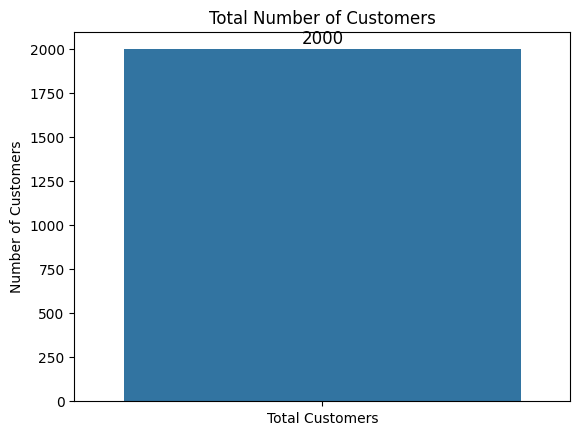

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total number of unique customers
Total_cust = churn_data['customer_id'].nunique()

# Create a single-element DataFrame for plotting
sns.barplot(x=['Total Customers'], y=[Total_cust])

# Add labels and title
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers')

# Add text annotation on top of the bar
plt.text(x=0, y=Total_cust + 10, s=str(Total_cust), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()


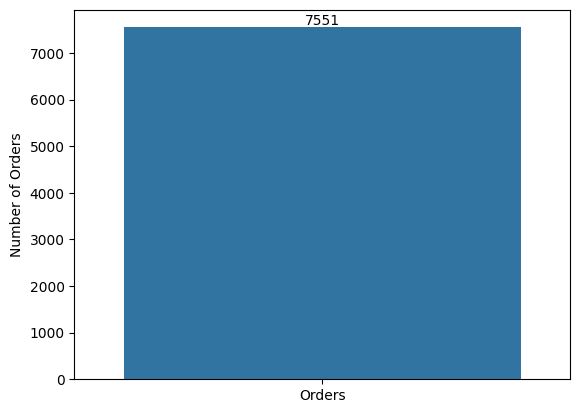

In [124]:
# total number of order
order_num = churn_data['order_id'].nunique()

sns.barplot(x=['Orders'], y=order_num)
plt.ylabel("Number of Orders")
plt.text(x=0,y=order_num,s=str(order_num),ha = 'center',va='bottom')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17764\3992339167.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index.astype(str), y=top_10.values,palette='viridis')


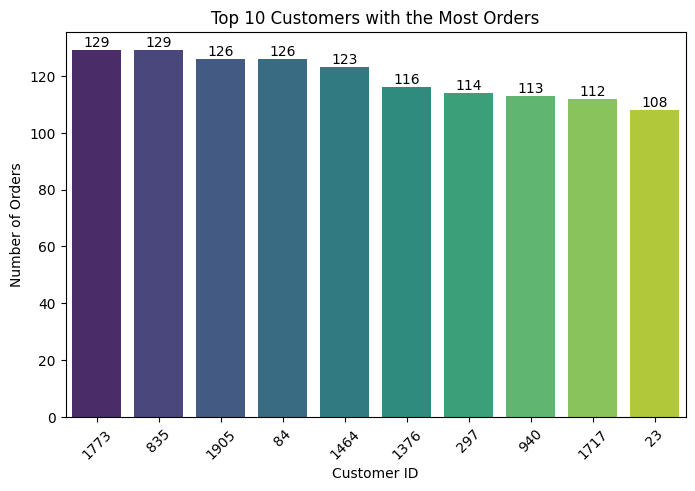

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by customer_id and count the number of orders for each customer
grouped = churn_data.groupby('customer_id')['order_id'].agg('count')

# Sort the customers by number of orders in descending order and get the top 10
top_10 = grouped.sort_values(ascending=False).head(10)

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plotting the top 10 customers with highest number of orders
sns.barplot(x=top_10.index.astype(str), y=top_10.values,palette='viridis')

# Add labels and title
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 10 Customers with the Most Orders')

# Adding the numerical values on top of the bars
for i in range(len(top_10)):
    plt.text(i, top_10.values[i] + 0.1,  # Positioning the text slightly above the bar
             s= str(top_10.values[i]),       # The text is the order count value
             ha='center', va='bottom',    # Text alignment
             fontsize=10, color='black')  # Font size and color

# Show the plot
plt.xticks(rotation=45)  # Rotate customer IDs if necessary to avoid overlap
plt.show()


In [200]:
# Number of customer with min 10 orders
pd.set_option('display.max_rows', None)
grouped = churn_data.groupby('customer_id')['order_id'].agg('count')

min_order = grouped[grouped<20]
min_order.shape


(1085,)

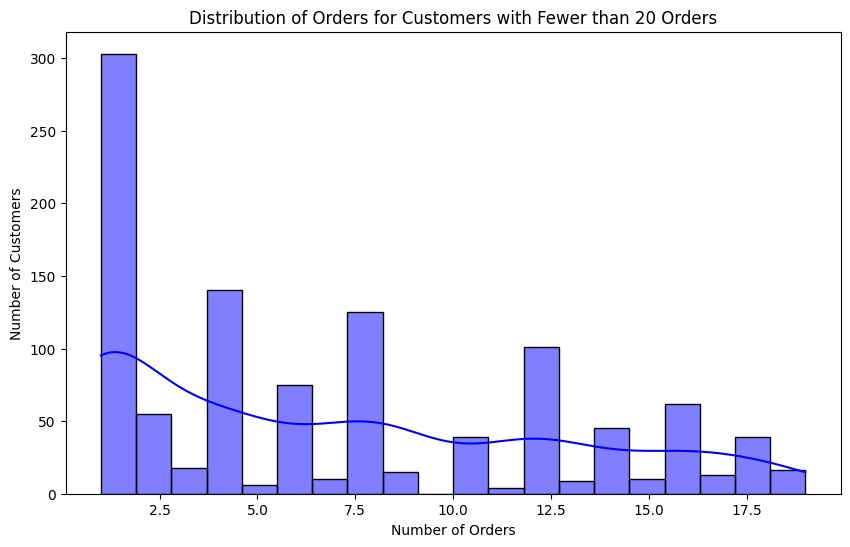

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by customer_id and count the number of orders per customer
grouped = churn_data.groupby('customer_id')['order_id'].agg('count')

# Filter customers with fewer than 20 orders
min_order = grouped[grouped < 20]

# Plot the distribution of orders for customers with fewer than 20 orders
plt.figure(figsize=(10, 6))
sns.histplot(min_order, kde=True, color='blue', bins=20)

# Add labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders for Customers with Fewer than 20 Orders')

# Show the plot
plt.show()